# M01 Lab: Further Exploration

DS 5001 Text as Data

## Intro

### Purpose

We continue exploring the Gutenberg text, looking at simple word dispersion plots and correlations.

### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
data_home = "../input"
output_dir = "../working"
prev_nb = f"{data_home}/uva-ds-5001-m01-01-first-foray"

### Retrieve Data

In [4]:
TOKEN = pd.read_csv(f"{prev_nb}/M01-ff-TOKENS.csv")[['term_str']]
VOCAB = pd.read_csv(f"{prev_nb}/M01-ff-VOCAB.csv").set_index('term_str')

In [5]:
TOKEN.head()

,term_str
0,the
1,project
2,gutenberg
3,ebook
4,of


In [6]:
VOCAB.head()

,n,p
term_str,,
the,3501,0.040564
to,2862,0.033161
and,2851,0.033033
of,2684,0.031098
a,1648,0.019095


## Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


### Project tokens onto feature space

In [7]:
DISPERSION = pd.get_dummies(TOKEN.term_str, dtype='int')
DISPERSION.index.name = 'token_pos'
DISPERSION = DISPERSION[DISPERSION.sum(1) == 1] # Remove rows without a 1

In [8]:
DISPERSION

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
token_pos,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize

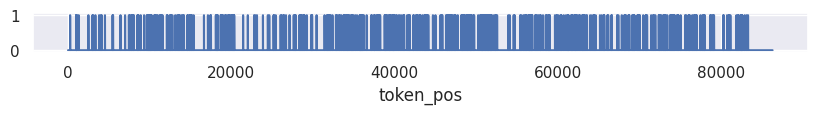

In [9]:
DISPERSION['anne'].plot(figsize=(10, .5));

In [10]:
def word_plot(term_str):
    term_str = term_str.lower()
    DISPERSION[term_str].plot(figsize=(10, .5), legend=False, title=term_str.upper());

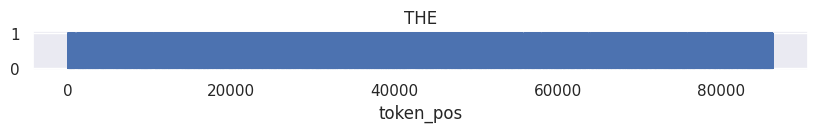

In [11]:
word_plot('the')

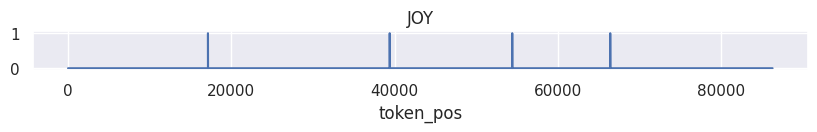

In [12]:
word_plot('joy')

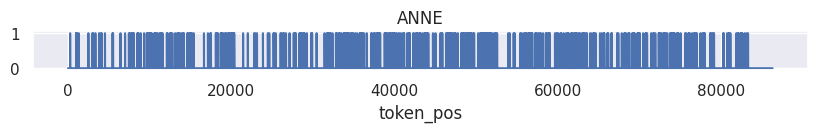

In [13]:
word_plot('anne')

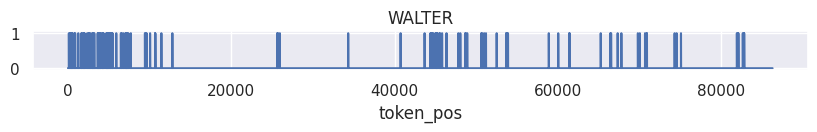

In [14]:
word_plot('walter')

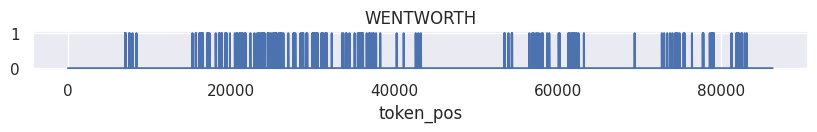

In [15]:
word_plot('wentworth')

### Heatmap of Chunks

We chunk narrative time into 100 chunks of equal length (centiles). 

Then we count how many times each word appears in each centile.

In [16]:
G = DISPERSION.groupby(pd.cut(DISPERSION.index, 100), observed=False).sum()
G = G.reset_index(drop=True)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

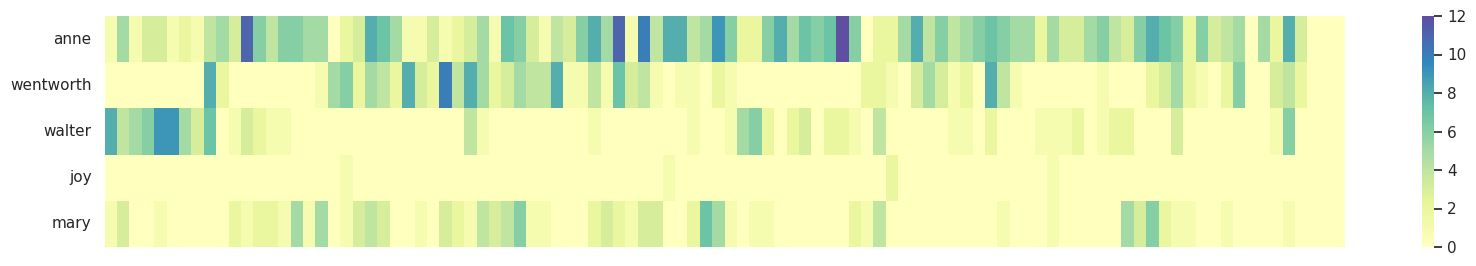

In [18]:
my_cols = ['anne','wentworth','walter', 'joy', 'mary']
sns.heatmap(G[my_cols].T, cmap='Spectral', center=0)
plt.gcf().set_figwidth(20)
plt.gcf().set_figheight(len(my_cols) * .6)
plt.yticks(rotation=0)
plt.xticks([])
plt.xlabel('')
plt.show()

## Correlation Graphs

We compare plots for pairs of words.

### Convert to relative frequency

In [19]:
GN = G / G.sum()

In [20]:
GN.head()

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.0,0.0,0.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def pair_corr(a, b, method='kendall'):
    return G[[a,b]].corr(method=method).values[0,1].round(2)

In [22]:
pair_corr('wentworth', 'anne')

np.float64(0.04)

In [23]:
pair_corr('walter', 'anne')

np.float64(-0.05)

In [24]:
pair_corr('walter', 'wentworth')

np.float64(-0.27)

### Visualize

In [25]:
def plot_cooc(a, b, norm=1):
    my_corr = pair_corr(a,b)
    X = GN if norm else G
    X[[a,b]].rolling(10).mean().plot(figsize=(20,5), style='o-', title=f"{a}, {b} {my_corr} ({norm})");

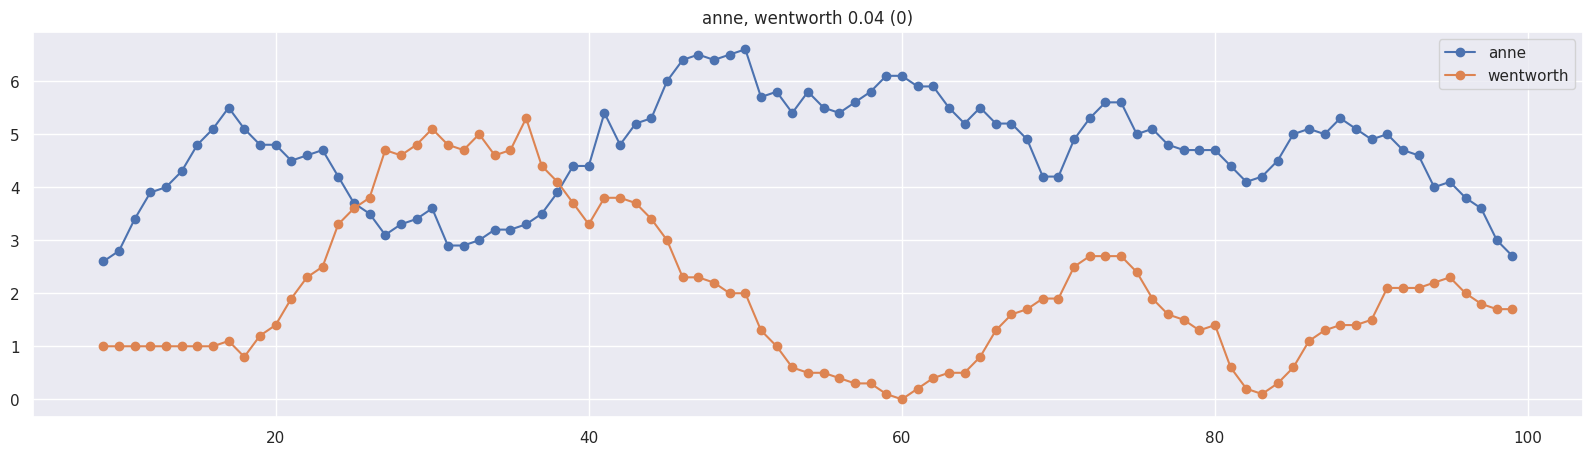

In [26]:
plot_cooc('anne','wentworth', 0)

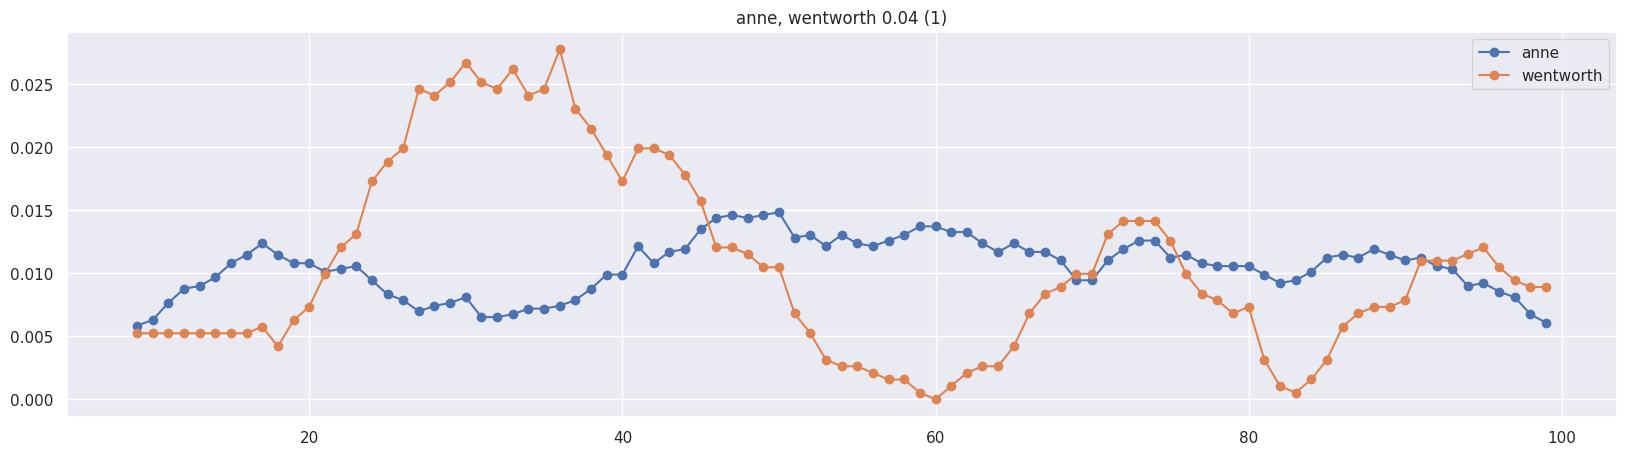

In [27]:
plot_cooc('anne','wentworth')

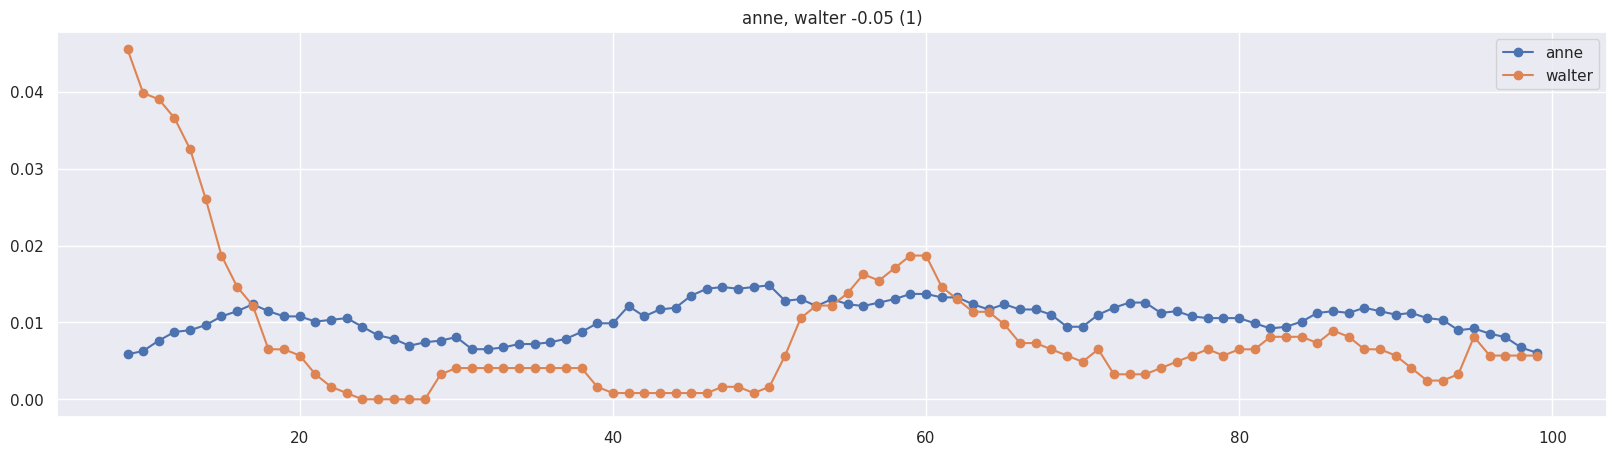

In [28]:
plot_cooc('anne','walter')

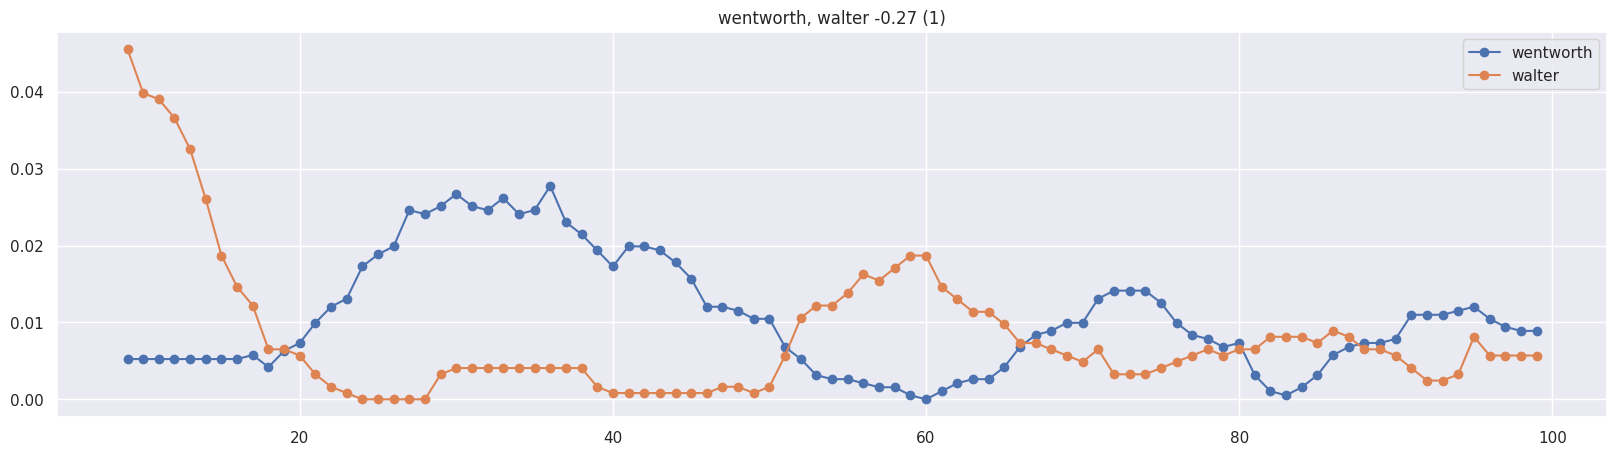

In [29]:
plot_cooc('wentworth','walter')

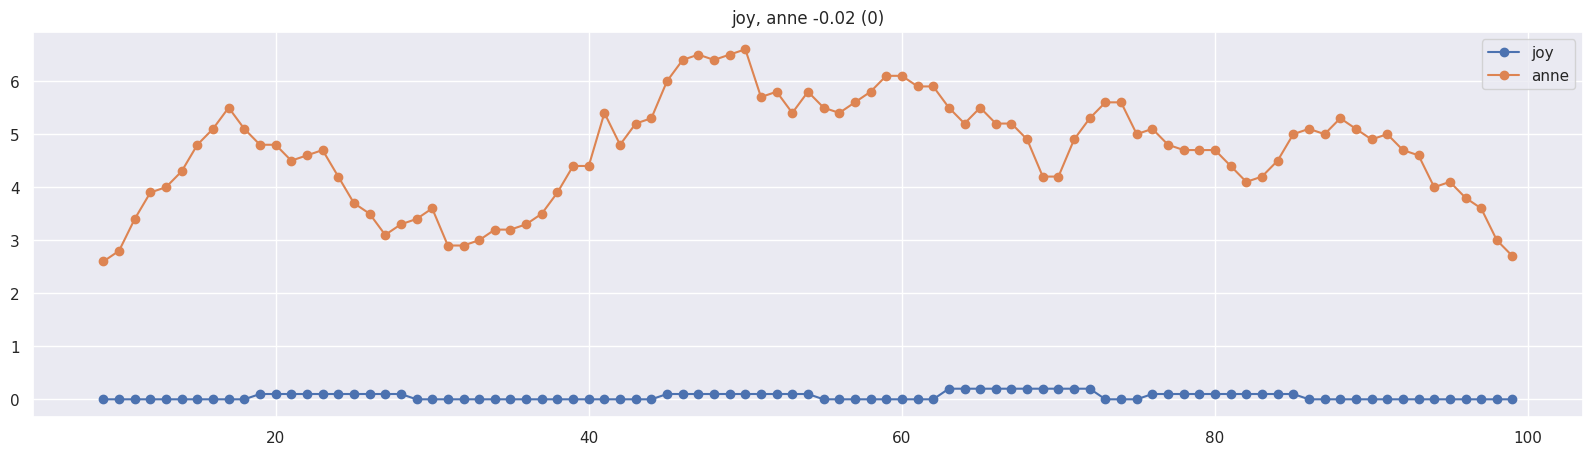

In [30]:
plot_cooc('joy','anne', 0)

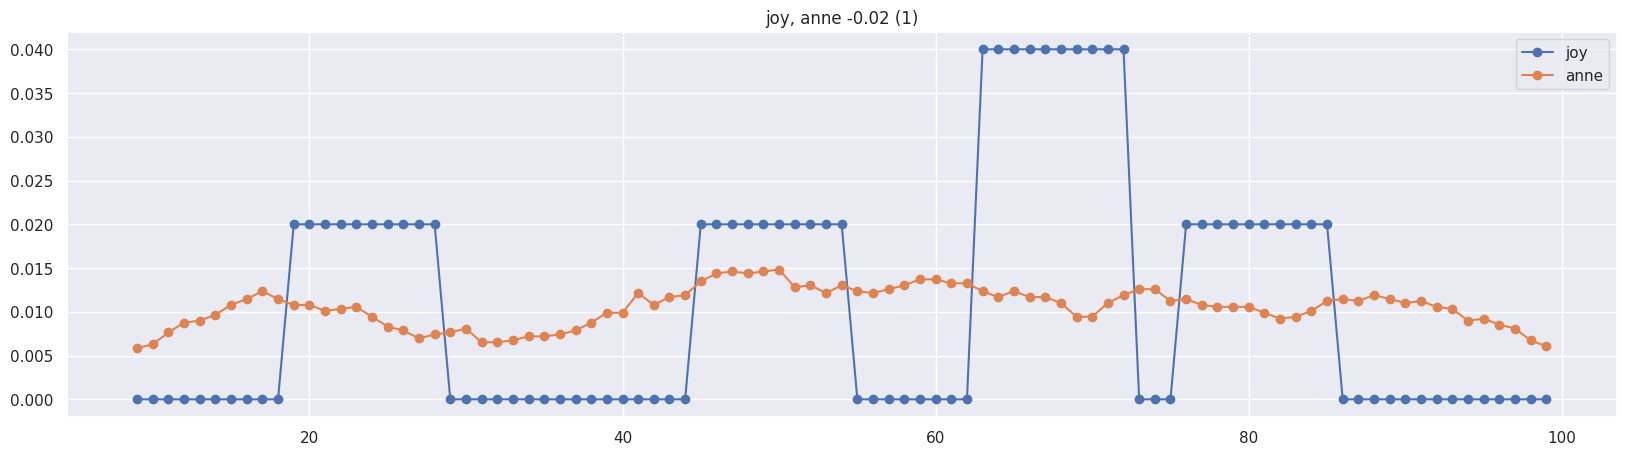

In [31]:
plot_cooc('joy','anne')

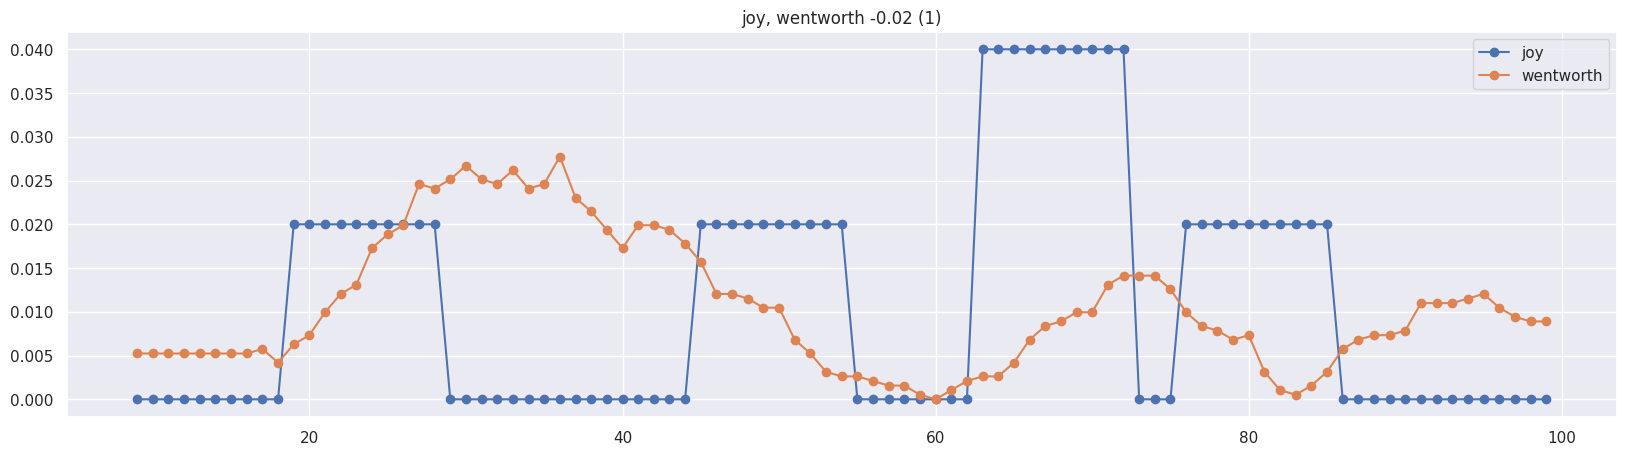

In [32]:
plot_cooc('joy','wentworth')

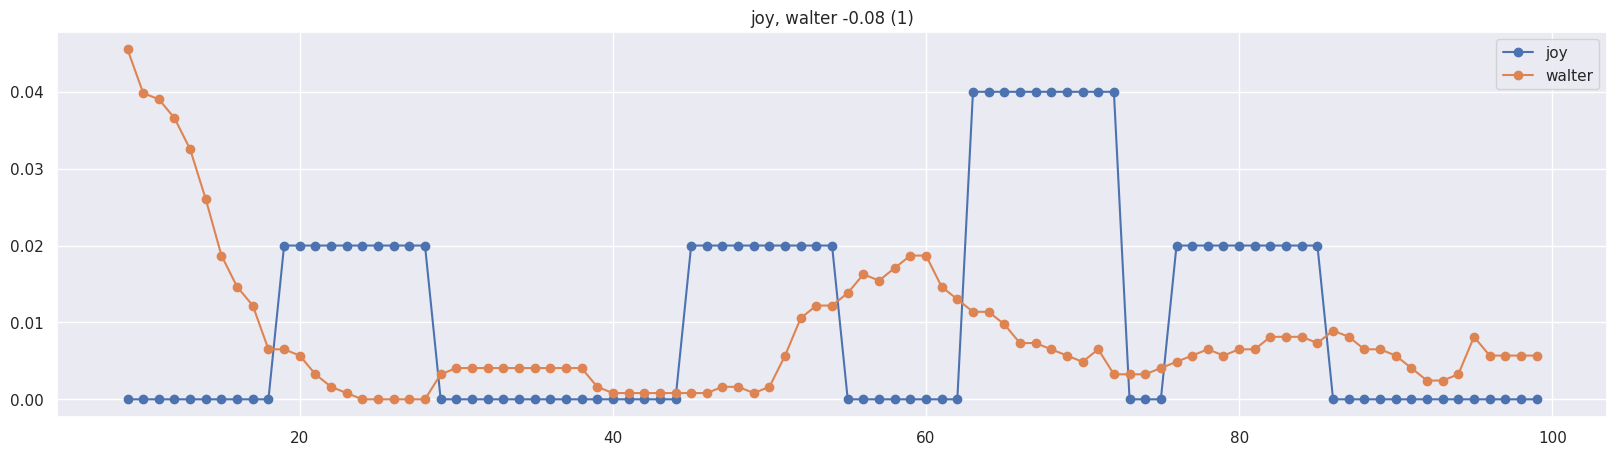

In [33]:
plot_cooc('joy','walter')

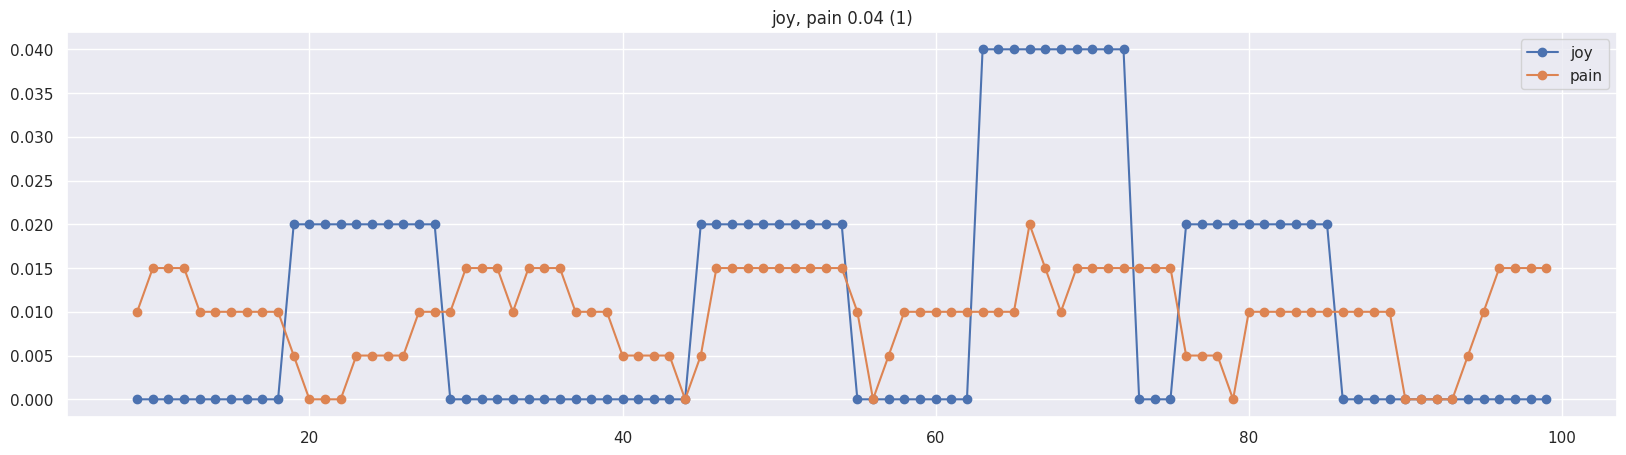

In [34]:
plot_cooc('joy', 'pain')